In [2]:
from numpy.typing import ArrayLike
import numpy as np
import pymc as pm

import arviz as az
import graphviz as gr
import matplotlib.pyplot as plt

az.style.use("arviz-grayscale")


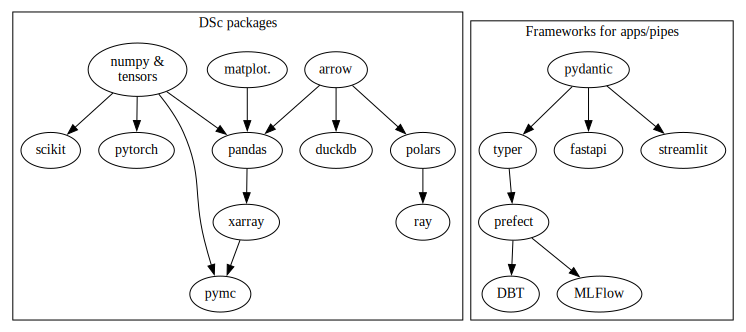

In [3]:
g = gr.Digraph()
g.attr(compound='true', orientation="P")

with g.subgraph(name='cluster_ds') as c1:
    c1.attr(label='DSc packages')
    c1.edge("arrow", "pandas")
    c1.edge("numpy &\ntensors", "pandas")
    c1.edge("matplot.", "pandas")
    c1.edge("pandas", "xarray")
    c1.edge("xarray", "pymc")
    c1.edge("numpy &\ntensors", "scikit")
    c1.edge("numpy &\ntensors", "pytorch")
    c1.edge("arrow", "duckdb")
    c1.edge("arrow", "polars")
    c1.edge("numpy &\ntensors", "pymc")
    c1.edge("polars", "ray")

with g.subgraph(name='cluster_fullstack') as c4:
    c4.attr(label='Frameworks for apps/pipes')
    c4.edge("pydantic", "typer")
    c4.edge("pydantic", "fastapi")
    c4.edge("pydantic", "streamlit")
    c4.edge("prefect", "DBT")
    c4.edge("prefect", "MLFlow")
    c4.edge("typer", "prefect")

g

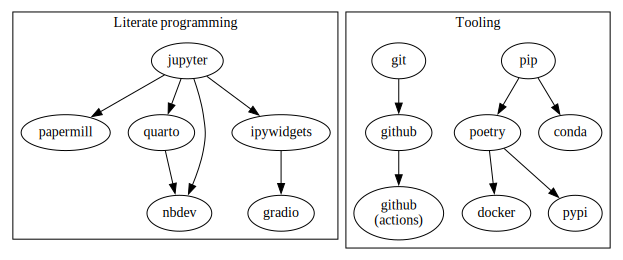

In [4]:
g = gr.Digraph()
g.attr(compound='true', orientation="P")

with g.subgraph(name='cluster_litrprog') as c2:
    c2.attr(label='Literate programming')
    c2.edge("jupyter", "papermill", )
    c2.edge("jupyter", "quarto", )
    c2.edge("quarto", "nbdev")
    c2.edge("jupyter", "nbdev")
    c2.edge("jupyter", "ipywidgets")
    c2.edge("ipywidgets", "gradio")

with g.subgraph(name='cluster_tooling') as c3:
    c3.attr(label='Tooling')
    c3.edge("pip", "poetry")
    c3.edge("poetry", "docker")
    c3.edge("pip", "conda")
    c3.edge("git", "github")
    c3.edge("github", "github\n(actions)")
    c3.edge("poetry", "pypi")

g

this is the old probability tree again!


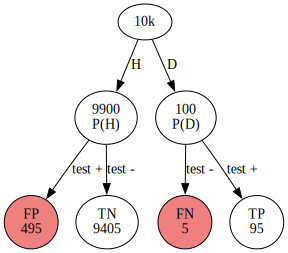

In [5]:
g = gr.Digraph()
g.attr(compound='true', orientation="P")

g = gr.Digraph()

g.edge("10k", "9900\nP(H)", label="H")
g.edge("9900\nP(H)", "FP\n495", label="test +")
g.edge("9900\nP(H)", "TN\n9405", label="test -")
g.node("FP\n495", fillcolor="lightcoral", style="filled")

g.edge("10k", "100 \nP(D)", label="D", )
g.edge("100 \nP(D)", "FN\n5", label="test -")
g.edge("100 \nP(D)", "TP\n95", label="test +")
g.node("FN\n5", fillcolor="lightcoral", style="filled")

print("this is the old probability tree again!")
g

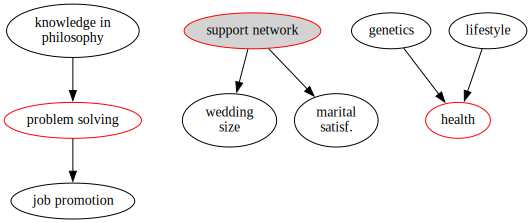

In [6]:
g = gr.Digraph()

g.edge("knowledge in \n philosophy", "problem solving")
g.edge("problem solving", "job promotion")
g.node("problem solving", color = "red")

g.edge("support network", "wedding \n size")
g.edge("support network", "marital \n satisf.")
g.node("support network", color = "red", fillcolor="lightgrey", style="filled")


g.edge("genetics", "health")
g.edge("lifestyle", "health")
g.node("health", color = "red")

g

In [7]:
def inverse_probability(
    observed_value: int, 
    p_prior: float | None = None, 
    true_positive_rate  = 0.95, # sensitivity, tnr = specificity
    true_negative_rate  = 0.9,
) -> float | ArrayLike:
    """We will apply this both to medical testing and test-driven development"""
    p_prior_ = np.linspace(0, 1, 50) if p_prior is None else p_prior
        
    likelihood = true_positive_rate if (x := observed_value) else 1 - true_positive_rate
    false_positive_rate = 1 - true_negative_rate
    prob_x_given_not_p = false_positive_rate if (x := observed_value) else true_negative_rate
    posterior = ( 
        p_prior_ * likelihood /
        (p_prior_ * likelihood +  (1 - p_prior_) * prob_x_given_not_p)
    )
    return round(posterior, 2) if  isinstance(posterior, float) else posterior

In [8]:
# P(D | +)
pr_rare_disease = inverse_probability(1, 0.01, 
    true_negative_rate=0.95, true_positive_rate=0.95)

print(
    'Updating the probability of a rare disease, given a positive test',
    pr_rare_disease
)
print(
    'Updating the probability of a rare disease, given a positive test',
    inverse_probability(1, pr_rare_disease, true_negative_rate=0.95, true_positive_rate=0.95)
)

Updating the probability of a rare disease, given a positive test 0.16
Updating the probability of a rare disease, given a positive test 0.78


In [9]:
print("Let's say I nailed 10 test cases in a row, how confident I am there are still bugs?")
tpr, tnr = 0.5, 0.7
posteriors_, p = [], 0.4
for i in range(10):
    p = inverse_probability(1, p_prior=p, true_negative_rate=tnr, true_positive_rate=tpr)
    posteriors_.append(p)
    print(f"After {i} passed tests: P(A|X) = {p}")

Let's say I nailed 10 test cases in a row, how confident I am there are still bugs?
After 0 passed tests: P(A|X) = 0.53
After 1 passed tests: P(A|X) = 0.65
After 2 passed tests: P(A|X) = 0.76
After 3 passed tests: P(A|X) = 0.84
After 4 passed tests: P(A|X) = 0.9
After 5 passed tests: P(A|X) = 0.94
After 6 passed tests: P(A|X) = 0.96
After 7 passed tests: P(A|X) = 0.98
After 8 passed tests: P(A|X) = 0.99
After 9 passed tests: P(A|X) = 0.99


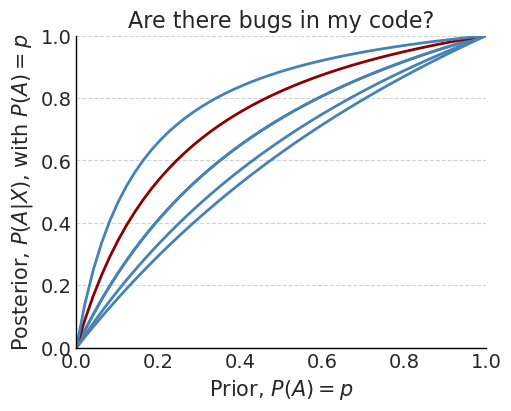

In [10]:
p = np.linspace(0, 1, 50)

seq_test_results = [1, 1, 1, 0, 1, 1]
colors = ["steelblue", "steelblue", "steelblue", "darkred", "steelblue", "steelblue"]
posteriors_ = []
for idx, x in enumerate(seq_test_results):
    if idx == 0:
        y = inverse_probability(seq_test_results[idx], true_negative_rate=tnr, true_positive_rate=tpr)
        posteriors_.append(y)
    y = inverse_probability(
        seq_test_results[idx], 
        p_prior = posteriors_[idx-1], 
        true_negative_rate=tnr, 
        true_positive_rate=tpr
    )
    posteriors_.append(y)

fig, ax = plt.subplots(figsize=(5, 4), layout='constrained')
fig.set_facecolor("white")

for idx in range(6):
    ax.plot(p, posteriors_[idx], lw=2, color = colors[idx])

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("Prior, $P(A) = p$")
    ax.set_ylabel("Posterior, $P(A|X)$, with $P(A) = p$")
    ax.yaxis.grid(True, color="lightgrey", linestyle="--")
    ax.yaxis.grid(True, color="lightgrey", linestyle="--")
    ax.set_facecolor("white")
    ax.set_facecolor("white")

plt.title("Are there bugs in my code?");


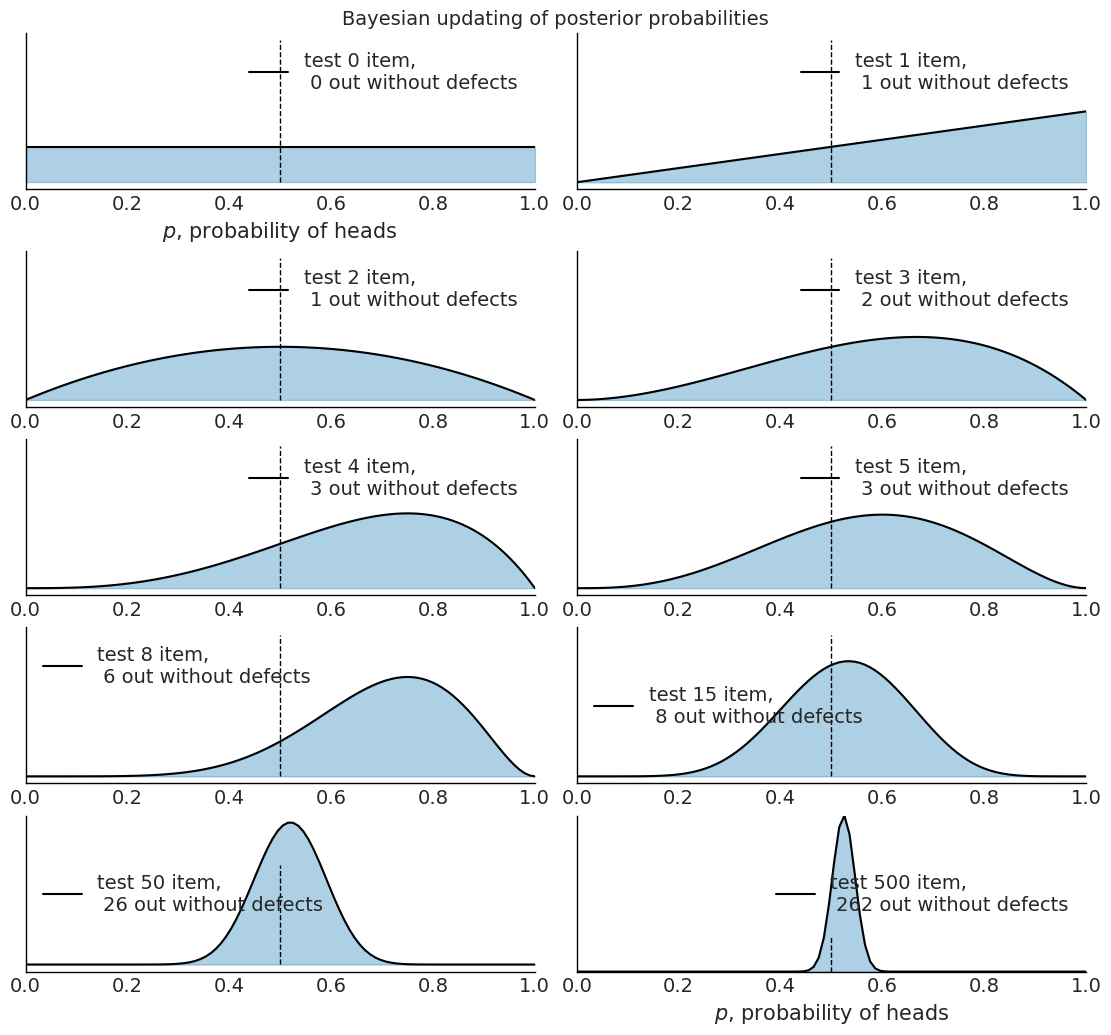

In [11]:
import scipy.stats as stats # needed for beta
rng = np.random.default_rng(seed=1231)

n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = rng.binomial(p=0.5, n=1, size=500) 
x = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(11, 10), layout='constrained', nrows=5, ncols=2)
fig.set_facecolor("white")
fig.set_facecolor("white")

k = 0
for row in range(5):
    for column in range(2):
        ax[row][column].plot()
        ax[row][column].set_xlim(0, 1)
        # ax[row][column].set_ylim(0, 1)
        ax[row][column].set_facecolor("white")
        ax[row][column].set_xlabel("$p$, probability of heads") if k in [0, len(n_trials) - 1] else None

        N = n_trials[k]
        heads = data[:N].sum()
        y = stats.beta.pdf(x, 1 + heads, 1 + N - heads)

        ax[row][column].plot(x, y, label="test %d item,\n %d out without defects" % (N, heads))
        ax[row][column].fill_between(x, 0, y, color="#348ABD", alpha=0.4)
        ax[row][column].vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

        leg = ax[row][column].legend()
        leg.get_frame().set_alpha(0.4)

        ax[row][column].yaxis.grid(True, color="lightgrey", linestyle="--")
        ax[row][column].xaxis.grid(False)
        ax[row][column].yaxis.set_visible(False)
        plt.autoscale(tight=True)
        k += 1
_ = fig.suptitle("Bayesian updating of posterior probabilities", y=1.02, fontsize=14)

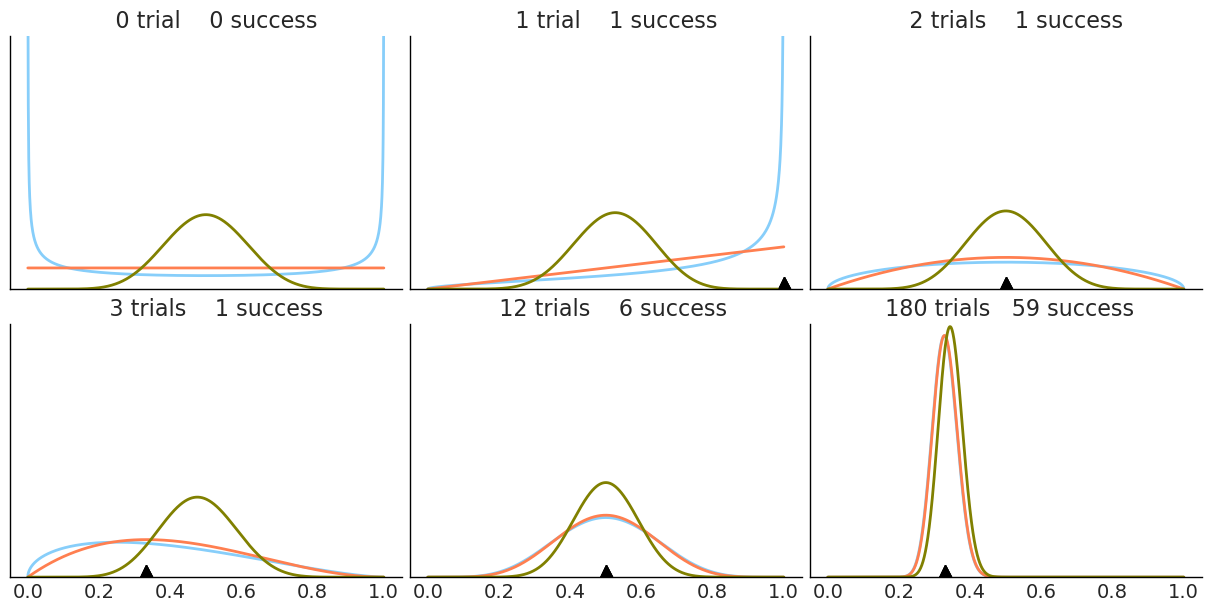

In [13]:
viridish = ["lightskyblue", "coral", "olive"]
_, axes = plt.subplots(2,3, figsize=(12, 6), sharey=True, sharex=True,
                     constrained_layout=True)
axes = np.ravel(axes)

n_trials = [0, 1, 2, 3, 12, 180]
success = [0, 1, 1, 1, 6, 59]
data = zip(n_trials, success)

beta_params = [(0.5, 0.5), (1, 1), (10, 10)]
θ = np.linspace(0, 1, 1500)
for idx, (N, y) in enumerate(data):
    s_n = ('s' if (N > 1) else '')
    for jdx, (a_prior, b_prior) in enumerate(beta_params):
        p_theta_given_y = stats.beta.pdf(θ, a_prior + y, b_prior + N - y)

        axes[idx].plot(θ, p_theta_given_y, lw=2, color=viridish[jdx])
        axes[idx].set_yticks([])
        axes[idx].set_ylim(0, 12)
        if idx != 0:
            axes[idx].plot(np.divide(y, N), 0, color='k', marker='^', ms=18)
        axes[idx].set_title(f'{N:4d} trial{s_n} {y:4d} success')

_ = plt.show()

In [14]:
Y = stats.bernoulli(0.7).rvs(200)

with pm.Model() as model:
    theta = pm.Beta("theta", alpha=1, beta=1) # Prior
    y_obs = pm.Binomial("y_obs", n=1, p=theta, observed=Y) # Likelihood

    # Sample from posterior distribution
    idata = pm.sample(1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


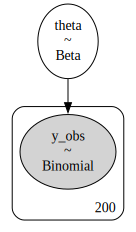

In [15]:
pm.model_to_graphviz(model)

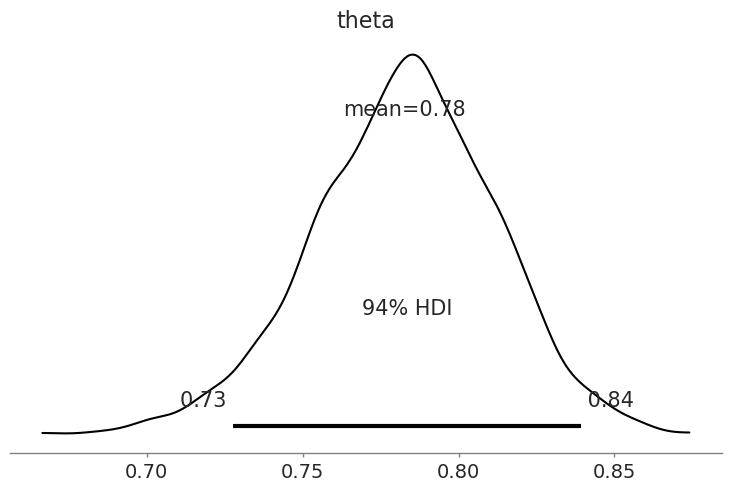

In [16]:
_ = az.plot_posterior(idata)